In [143]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem, linregress
import numpy as np
import scipy.stats as st


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [144]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [145]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [146]:
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [147]:
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [148]:
unique_mice_count = merged_data['Mouse ID'].nunique()
unique_mice_count

249

In [149]:
duplicate_mice = merged_data[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [150]:
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [151]:
updated_mice_count = cleaned_data["Mouse ID"].nunique()
updated_mice_count

249

In [152]:
# Generate Summary Statistics
summary_stats = cleaned_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', sem)
).reset_index()

summary_stats

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


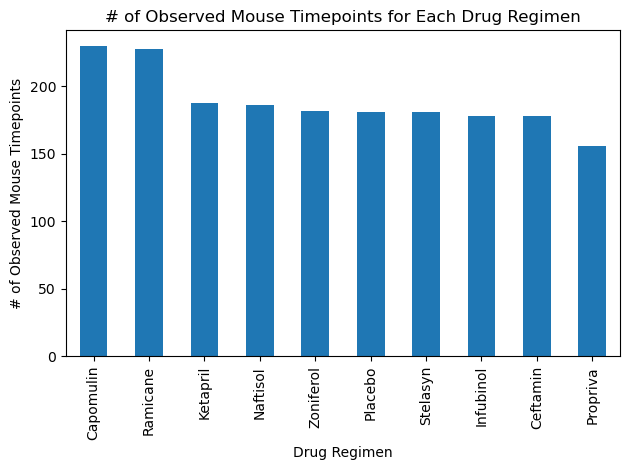

In [153]:
drug_counts = cleaned_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.title("# of Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

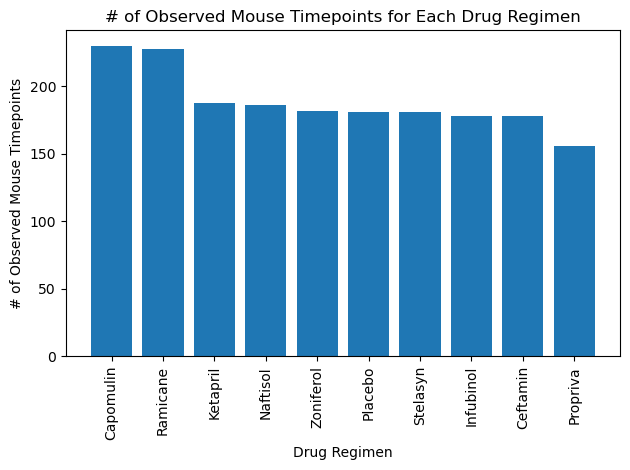

In [154]:
drug_counts = cleaned_data["Drug Regimen"].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.title("# of Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

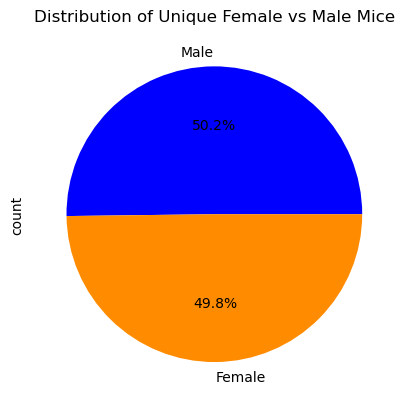

In [155]:
unique_mice_gender = cleaned_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['blue','darkorange'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
plt.show()

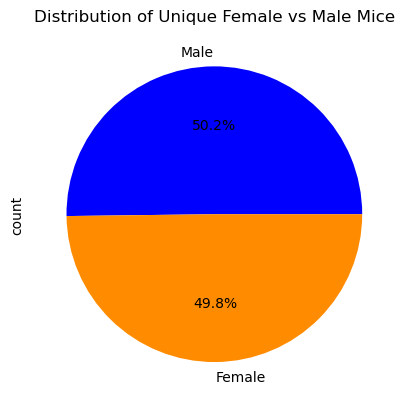

In [156]:
unique_mice_gender = cleaned_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=360, colors=['blue','darkorange'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
plt.show()

In [157]:
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")


cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')


promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
final_data = pd.merge(cleaned_data, last_timepoints, on=["Mouse ID", "Timepoint"])


final_data = final_data[final_data["Drug Regimen"].isin(promising_treatments)]

tumor_volume_data = []

for drug in promising_treatments:
    drug_data = final_data[final_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume_data.append(drug_data)
    
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


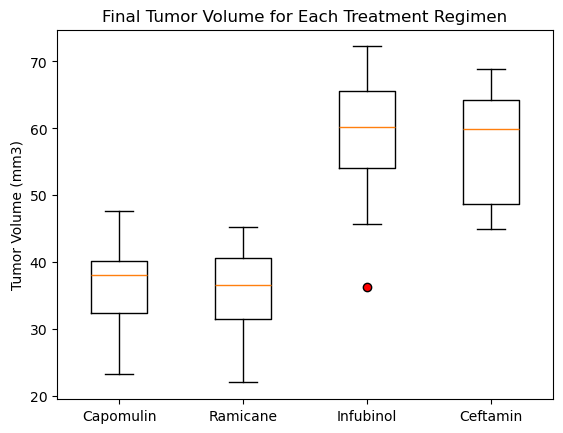

In [158]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=promising_treatments, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_title('Final Tumor Volume for Each Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


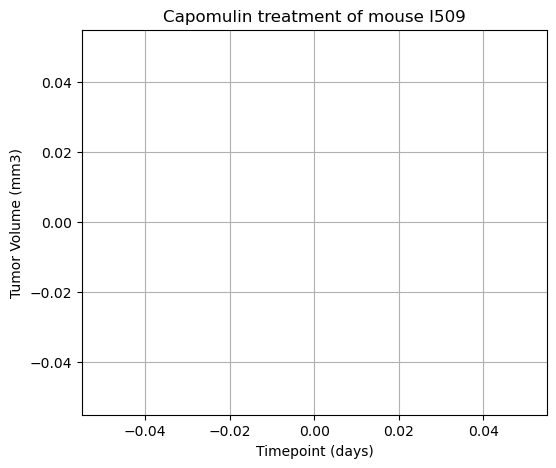

In [159]:

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

single_mouse_id = 'I509'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]


plt.figure(figsize=(6, 5))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Capomulin treatment of mouse {single_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

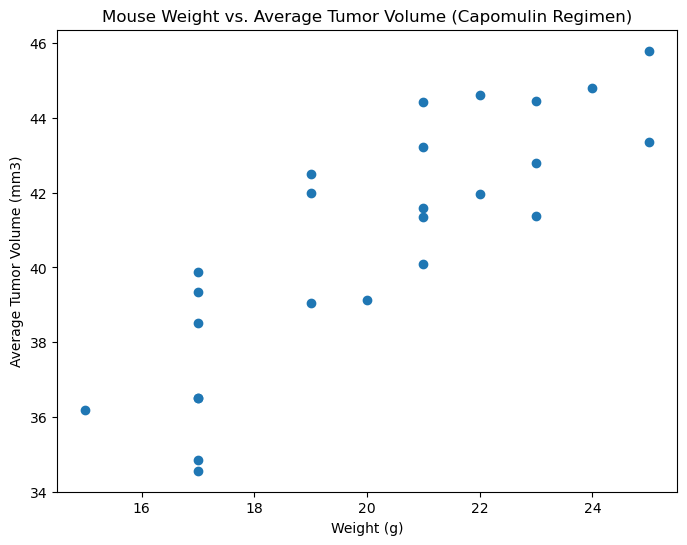

In [160]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')

average_tumor_volume = average_tumor_volume.to_frame().join(mouse_weight)

plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

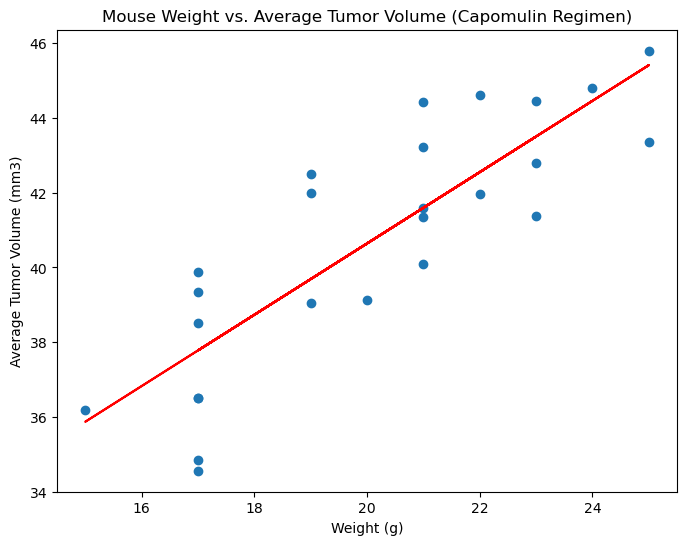

In [161]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')

average_tumor_volume = average_tumor_volume.to_frame().join(mouse_weight)

plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], label='Data points')
plt.plot(average_tumor_volume['Weight (g)'], intercept + slope * average_tumor_volume['Weight (g)'], 'r', label=f'Linear fit: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()
